0. 下準備

In [1]:
# モジュールのインポート
from matplotlib import pyplot as plt # matplotlibモジュールからpyplotというクラスを受け取り、名前が長いのでpltとこれから呼ぶようにする
import tensorflow as tf # tensorflowモジュールをインポートし、上同様名前が長いのでtfと呼ぶようにする
import numpy as np
# as ○○　とする場合はこれからプログラムからこれを使うときはasで指定した名前にしないとエラーが出る

In [2]:
# mnistの画像データを受け取る
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = tf.keras.datasets.mnist.load_data()

mnist_train_images = mnist_train_images[..., tf.newaxis]
mnist_test_images = mnist_test_images[..., tf.newaxis]

# cifar10の画像データを受け取る
(cifar10_train_images, cifar10_train_labels), (cifar10_test_images, cifar10_test_labels) = tf.keras.datasets.cifar10.load_data()

print(f"mnistの学習データ数:{len(mnist_train_images)}枚")
print(f"mnistの検証用データ数:{len(mnist_test_images)}枚")
print(f"cifar10の学習データ数:{len(cifar10_train_images)}枚")
print(f"cifar10の検証用データ数:{len(cifar10_test_images)}枚")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
mnistの学習データ数:60000枚
mnistの検証用データ数:10000枚
cifar10の学習データ数:50000枚
cifar10の検証用データ数:10000枚


1. 画像の中身

In [ ]:
# それぞれの画像のリストの一番最初の画像の形状を確認
print("画像の形状")
print("mnist（モノクロ画像） :", mnist_train_images[0].shape) # 配列.shapeでその配列の形状を確認できる
print("cifar10（カラー画像） :", cifar10_train_images[0].shape) # 配列.shapeでその配列の形状を確認できる

画像の形状
mnist（モノクロ画像） : (28, 28, 1)
cifar10（カラー画像） : (32, 32, 3)


In [ ]:
# モノクロ画像(mnist)の中身を確認
print(mnist_train_images[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
# カラー画像(cifar10)の中身を確認
print(cifar10_train_images[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


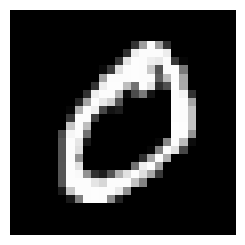

In [22]:
# それぞれの画像のリストの一番最初の画像を一度表示して確認
# 画像を表示する際にはmatplotlibを使用する
fig = plt.figure() # plt.figure()をインスタンス化(画像を張る土台を作っている)
ax = fig.add_subplot(1, 2, 1) # fig.add_subplot(縦に並べる画像の数, 横に並べる画像の数, この画像を並べる場所)
ax.imshow(mnist_train_images[1], cmap="gray") # 第一引数に表示したい画像を設定, cmap="gray"は入力された画像をグレースケールにして出力
ax.axis("off")# 軸(x軸とy軸)を非表示にする
plt.show()
ax = ax = fig.add_subplot(1, 2, 2) # fig.add_subplot(縦に並べる画像の数, 横に並べる画像の数, この画像を並べる場所（今回は2個目）)
ax.imshow(cifar10_train_images[0]) # 表示したい画像を入力する
ax.axis("off") # 軸(x軸とy軸)を非表示にする
plt.show() # 現在できている土台を表示する

rgbで分ける

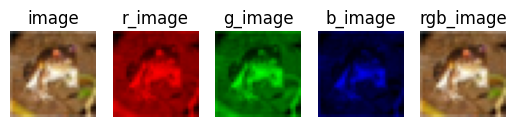

In [ ]:
image = cifar10_train_images[0]
r_image = []
g_image = []
b_image = []
rgb_image = []
# 画像をrgbで分ける
for row in image:
    r_image.append([[pixel[0], 0, 0] for pixel in row])
    g_image.append([[0, pixel[1], 0] for pixel in row])
    b_image.append([[0, 0, pixel[2]] for pixel in row])
# 分けたものを戻す
for R, G, B in zip(r_image, g_image, b_image):
    rgb_image.append([[r[0], g[1], b[2]] for r, g, b in zip(R,G,B)])

# 画像を表示して確認
fig = plt.figure()
ax = fig.add_subplot(1, 5, 1)
ax.imshow(image)
ax.set_title("image")
ax.axis("off")

ax = fig.add_subplot(1, 5, 2)
ax.imshow(r_image)
ax.set_title("r_image")
ax.axis("off")

ax = fig.add_subplot(1, 5, 3)
ax.imshow(g_image)
ax.set_title("g_image")
ax.axis("off")

ax = fig.add_subplot(1, 5, 4)
ax.imshow(b_image)
ax.set_title("b_image")
ax.axis("off")

ax = fig.add_subplot(1, 5, 5)
ax.imshow(rgb_image)
ax.set_title("rgb_image")
ax.axis("off")

plt.show()

2. 画像の前処理

色の変換

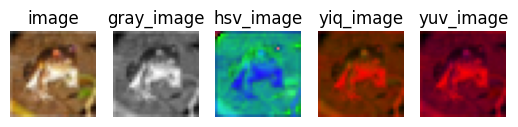

In [ ]:
image = cifar10_train_images[0]
# グレースケール変換
gray_image = tf.image.rgb_to_grayscale(image)
# hsv(h:色相, s:彩度, v:明度)変換
hsv_image = tf.image.rgb_to_hsv(image)
# yiq(y:輝度, i:オレンジから青色の色相成分, q:緑からマゼンダ色の色相成分)変換
yiq_image = tf.image.rgb_to_yiq(image)
# yuv(y:輝度信号, u:輝度と青色成分の差, v:輝度と赤色成分の差)変換
yuv_image = tf.image.rgb_to_yuv(image)

# 画像を表示して確認
fig = plt.figure()
ax = fig.add_subplot(1, 5, 1)
ax.imshow(image)
ax.set_title("image")
ax.axis("off")

ax = fig.add_subplot(1, 5, 2)
ax.imshow(gray_image, cmap="gray")
ax.set_title("gray_image")
ax.axis("off")

ax = fig.add_subplot(1, 5, 3)
ax.imshow(hsv_image)
ax.set_title("hsv_image")
ax.axis("off")

ax = fig.add_subplot(1, 5, 4)
ax.imshow(yiq_image)
ax.set_title("yiq_image")
ax.axis("off")

ax = fig.add_subplot(1, 5, 5)
ax.imshow(yuv_image)
ax.set_title("yuv_image")
ax.axis("off")

plt.show()

フリップ

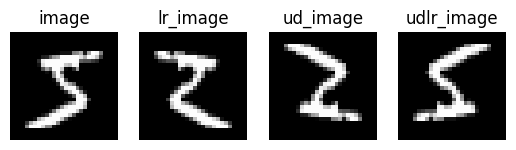

In [ ]:
image = mnist_train_images[0]
# 左右にフリップ
lr_image = tf.image.flip_left_right(image)
# 上下にフリップ
ud_image = tf.image.flip_up_down(image)
# 上下左右にフリップ
udlr_image = tf.image.flip_left_right(ud_image)

# 画像を表示して確認
fig = plt.figure()
ax = fig.add_subplot(1, 4, 1)
ax.imshow(image, cmap="gray")
ax.set_title("image")
ax.axis("off")

ax = fig.add_subplot(1, 4, 2)
ax.imshow(lr_image, cmap="gray")
ax.set_title("lr_image")
ax.axis("off")

ax = fig.add_subplot(1, 4, 3)
ax.imshow(ud_image, cmap="gray")
ax.set_title("ud_image")
ax.axis("off")

ax = fig.add_subplot(1, 4, 4)
ax.imshow(udlr_image, cmap="gray")
ax.set_title("udlr_image")
ax.axis("off")

plt.show()

トリミング

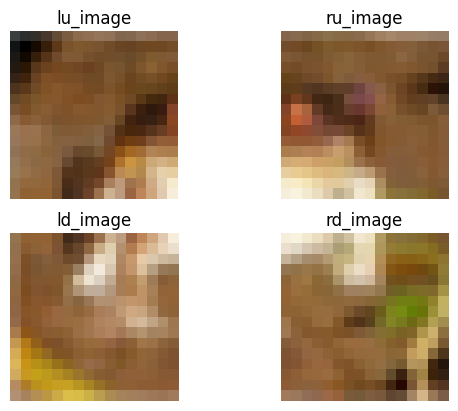

In [ ]:
image = [cifar10_train_images[0]]
# 画像のトリミング
boxes = np.array([
                    [0,0,0.5,0.5], # [y1,x1,y2,x2]
                    [0,0.5,0.5,1.0],
                    [0.5,0,1.0,0.5],
                    [0.5,0.5,1.0,1.0]
                    ])
box_indices = np.array([0,0,0,0])
crop_image = tf.image.crop_and_resize(image, boxes, box_indices, crop_size=(16,16))

# 画像を表示して確認
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.imshow(crop_image[0])
ax.set_title("lu_image")
ax.axis("off")

ax = fig.add_subplot(2, 2, 2)
ax.imshow(crop_image[1])
ax.set_title("ru_image")
ax.axis("off")

ax = fig.add_subplot(2, 2, 3)
ax.imshow(crop_image[2])
ax.set_title("ld_image")
ax.axis("off")

ax = fig.add_subplot(2, 2, 4)
ax.imshow(crop_image[3])
ax.set_title("rd_image")
ax.axis("off")

plt.show()

リサイズ

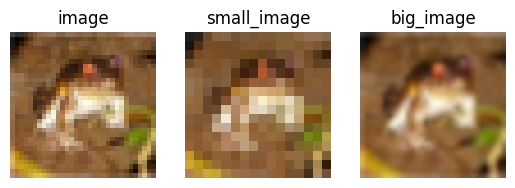

In [ ]:
image = cifar10_train_images[0]
# 画像のリサイズ
small_image = tf.image.resize(image, [16, 16])
big_image = tf.image.resize(image, [64, 64])

# 画像を表示して確認
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
ax.imshow(image)
ax.set_title("image")
ax.axis("off")

ax = fig.add_subplot(1, 3, 2)
ax.imshow(small_image)
ax.set_title("small_image")
ax.axis("off")

ax = fig.add_subplot(1, 3, 3)
ax.imshow(big_image)
ax.set_title("big_image")
ax.axis("off")

plt.show()

リアル画像を読み込む

In [ ]:
!wget https://www.shonan-it.ac.jp/media/bn-b005.png -O test.png

--2025-06-05 09:59:47--  https://www.shonan-it.ac.jp/media/bn-b005.png
Resolving www.shonan-it.ac.jp (www.shonan-it.ac.jp)... 150.60.144.101
Connecting to www.shonan-it.ac.jp (www.shonan-it.ac.jp)|150.60.144.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212634 (208K) [image/png]
Saving to: ‘test.png’

test.png            100%[===================>] 207.65K   586KB/s    in 0.4s    

2025-06-05 09:59:48 (586 KB/s) - ‘test.png’ saved [212634/212634]



In [ ]:
# 生画像の読み込み関数
def read_and_preprocess(image_path):
    read = tf.io.read_file(image_path)
    image = tf.image.decode_image(read, channels = 3, expand_animations = False)
    image = tf.image.resize(image, (image.shape)[:-1])
    image = tf.cast(image, tf.float32) / 255.0
    return image

In [ ]:
real_image = read_and_preprocess("test.png")

In [ ]:
print("画像の形状を確認 :", real_image.shape)

画像の形状を確認 : (540, 540, 3)


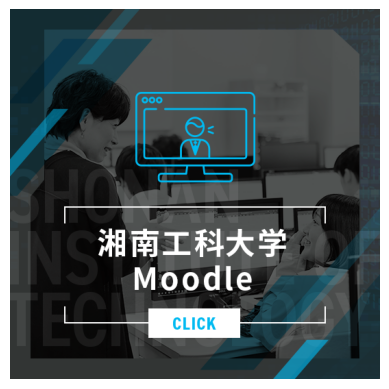

In [ ]:
# 画像を確認
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(real_image)
ax.axis("off")
plt.show()